# Explore here

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

Paso 1: Carga del conjunto de datos


In [1]:
"""
age. Edad del cliente (numérico)
job. Tipo de trabajo (categórico)
marital. Estado civil (categórico)
education. Nivel de educación (categórico)
default. ¿Tiene crédito actualmente? (categórico)
housing. ¿Tiene un préstamo de vivienda? (categórico)
loan. ¿Tiene un préstamo personal? (categórico)
contact. Tipo de comunicación de contacto (categórico)
month. Último mes en el que se le ha contactado (categórico)
day_of_week. Último día en el que se le ha contactado (categórico)
duration. Duración del contacto previo en segundos (numérico)
campaign. Número de contactos realizados durante esta campaña al cliente (numérico)
pdays. Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
previous. Número de contactos realizados durante la campaña anterior al cliente (numérico)
poutcome. Resultado de la campaña de marketing anterior (categórico)
emp.var.rate. Tasa de variación del empleo. Indicador trimestral (numérico)
cons.price.idx. Índice de precios al consumidor. Indicador mensual (numérico)
cons.conf.idx. Índice de confianza del consumidor. Indicador mensual (numérico)
euribor3m. Tasa EURIBOR 3 meses. Indicador diario (numérico)
nr.employed. Número de empleados. Indicador trimestral (numérico)
y. TARGET. El cliente contrata un depósito a largo plazo o no (categórico)

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')


In [ ]:
print("cantidad de filas y columnas", data.shape)
print("Nombre de las columnas",data.columns)
data.info()

cantidad de filas y columnas (41188, 21)
Nombre de las columnas Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  

Analisis de variables numericas

In [66]:
data.describe()
#Para una distribución aproximadamente normal:
#El 68% de los datos caen dentro de 1 desviación estándar de la media. age singma = 40.2- 10.42, 40.2+ 10.42, 
#El 95% caen dentro de 2 desviaciones estándar.
#El 99.7% caen dentro de 3 desviaciones estándar.

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [68]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Paso 2: Realiza un EDA completo


Analisis de variables numericads

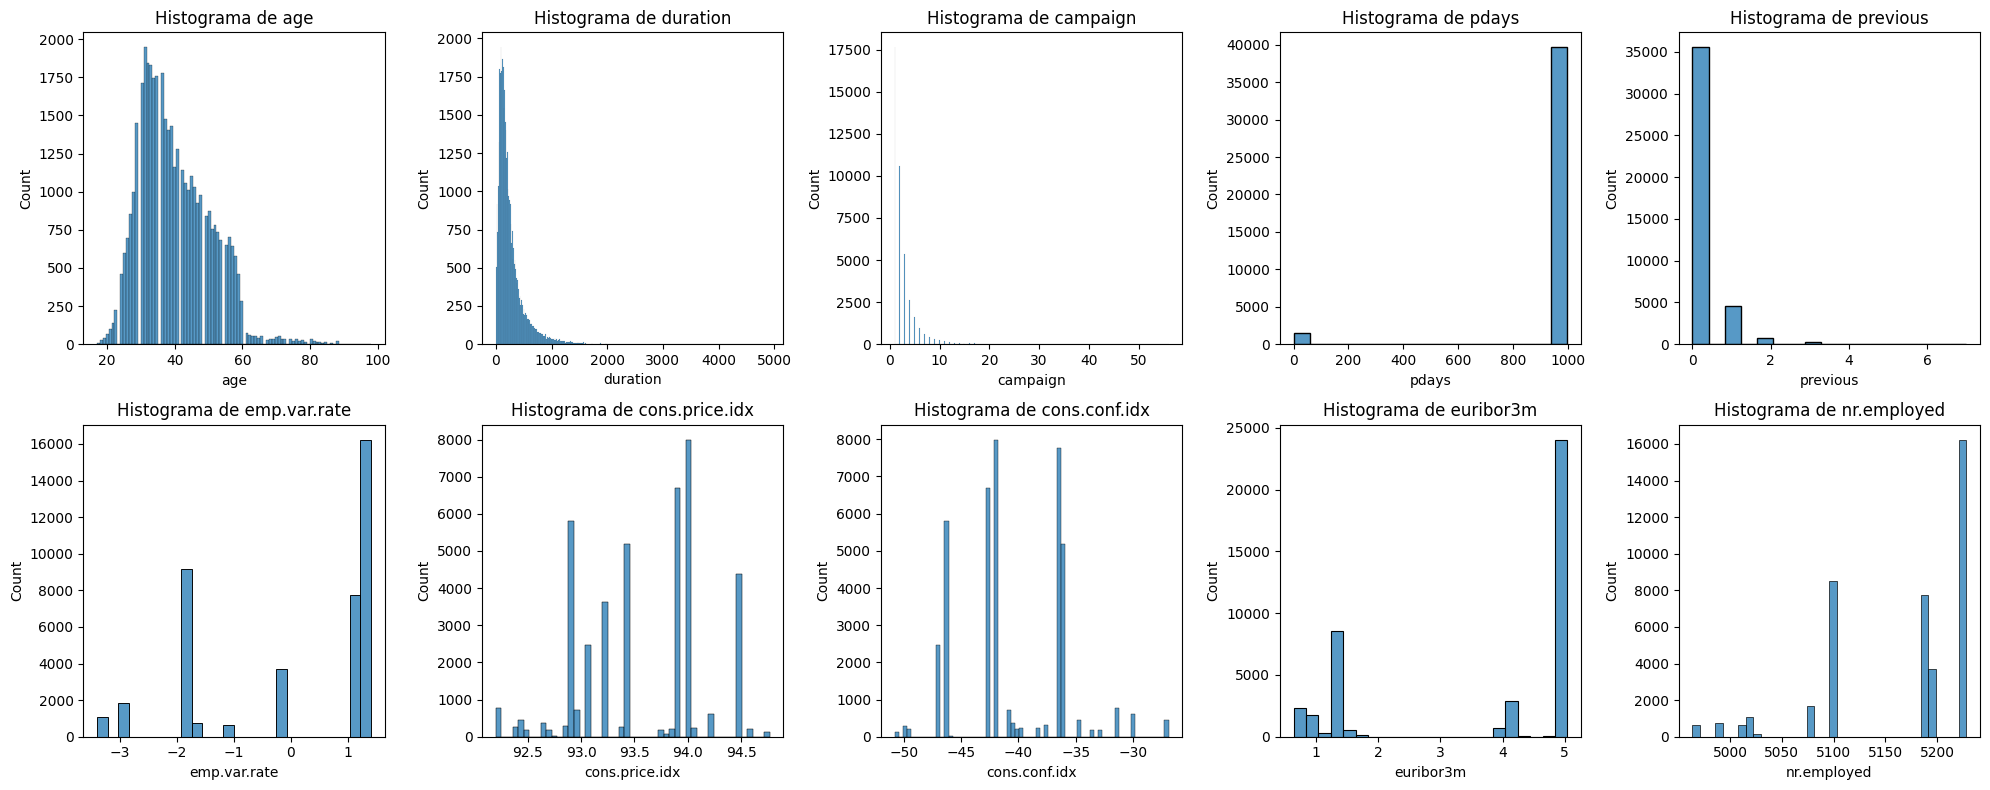

In [69]:

# Paso 1: Obtener columnas numéricas
var = data.select_dtypes(include='number').columns.tolist()

# Paso 2: Definir dimensiones fijas del grid
filas = 2
columnas = 5

# Paso 3: Crear subplots
fig, axes = plt.subplots(filas, columnas, figsize=(20, 8))  # Ajusta tamaño como quieras

axes = axes.flatten()  # Aplanar para acceso fácil

# Paso 4: Graficar cada variable
for i, col in enumerate(var):
    if i < len(axes):  # Para no pasarte del número de axes
        sns.histplot(data=data, x=col, ax=axes[i])
        axes[i].set_title(f"Histograma de {col}")

# Si sobran subplots, los apagas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Analisis de variables categoricas

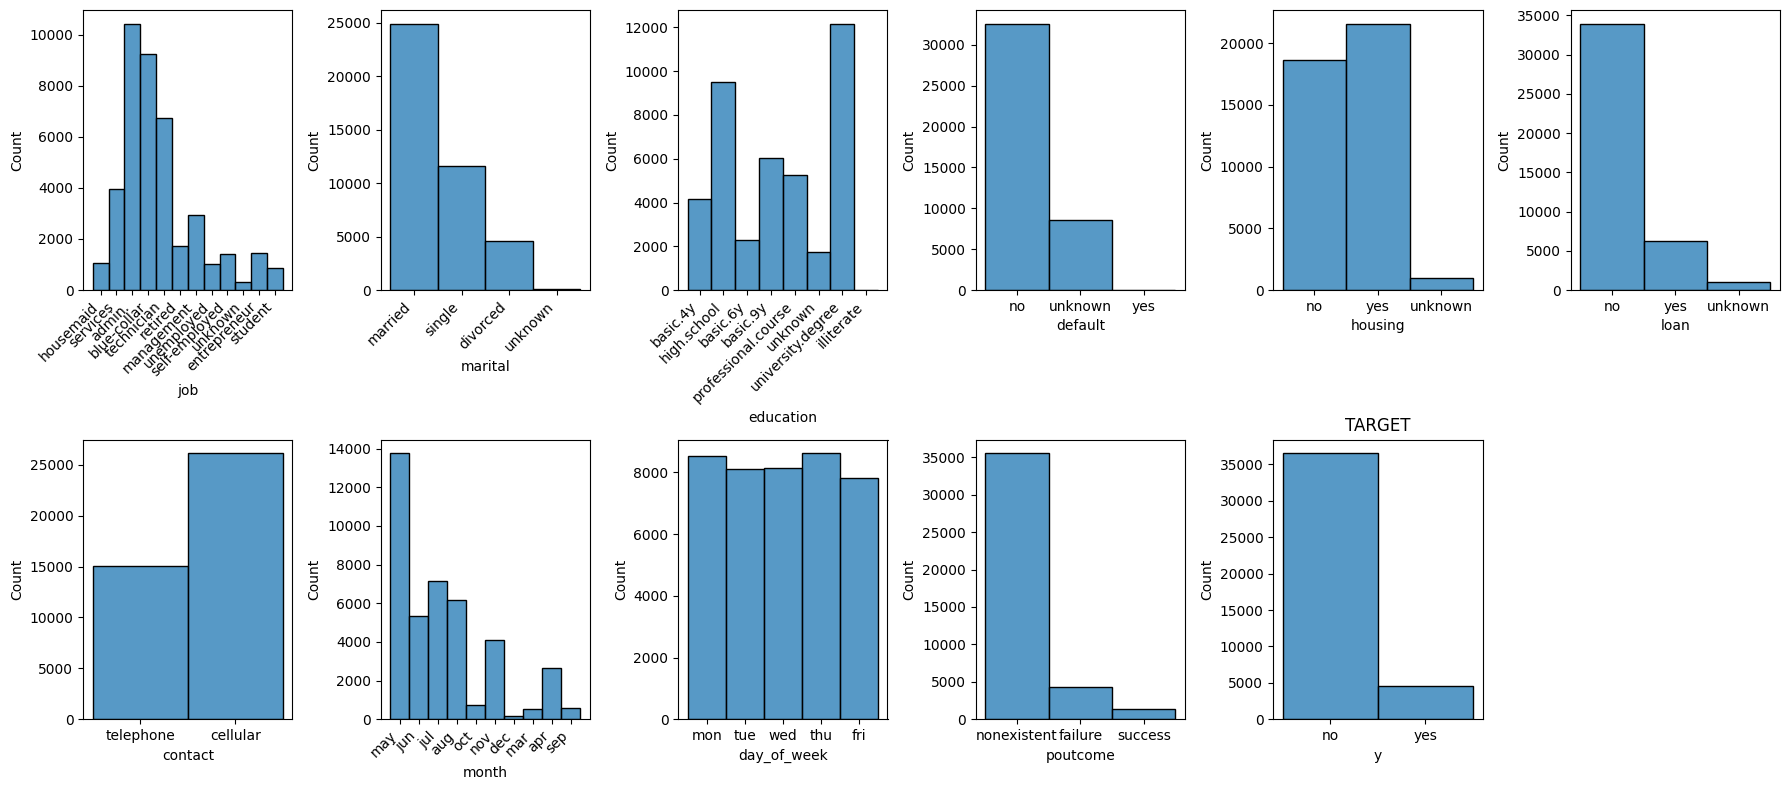

In [70]:
#Analisis de variables categoricas
# Visualización de variables categóricas

fig, axis = plt.subplots(2, 6, figsize=(18, 8))  # 1 fila, 3 columnas

sns.histplot(ax=axis[0][0], data=data, x="job")
axis[0][0].set_xticklabels(axis[0][0].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax=axis[0][1], data=data, x="marital")
axis[0][1].set_xticklabels(axis[0][1].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax=axis[0][2], data=data, x="education")
axis[0][2].set_xticklabels(axis[0][2].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax =axis[0][3], data = data, x = "default")
sns.histplot(ax =axis[0][4], data = data, x = "housing")
sns.histplot(ax =axis[0][5], data = data, x = "loan")
sns.histplot(ax =axis[1][0], data = data, x = "contact")
sns.histplot(ax =axis[1][1], data = data, x = "month")
axis[1][1].set_xticklabels(axis[1][1].get_xticklabels(), rotation=45, ha='right')
sns.histplot(ax =axis[1][2], data = data, x = "day_of_week")
sns.histplot(ax =axis[1][3], data = data, x = "poutcome")
sns.histplot(ax =axis[1][4], data = data, x = "y")
axis[1][4].set_title("TARGET")
axis[1][5].remove()
plt.tight_layout()
plt.show()# Guarda imagen

En la visualizacion de los datos podemos ver:
 
  -Se obtenieron la mayoria de los datos de personas casadas.

  -Adminiastradores, La clase obrera y tecnicos constituyen la mayor parte de los datos.

  -Se contactaron mas personas durante el mes de mayo.

  -Tambien podemos ver que no hubo contacto previo o no se tiene mayor informacion de contacto en campañas anteriores.
  
  -Target es nuestra variable a predecir.


Existen una gran cantidad de datos desconocidos en variables categoricas, que se podrian contar como outliers debido aque no son estudiables. Al no ser la mayoria de los datos es necesario eliminarlos para 
el correcto analisis de nuestro modelo. 



In [71]:
data_original = data.copy()
dc = data.drop(data[data["housing"] == "unknown"].index)
dc = dc.drop(dc[dc["loan"] == "unknown"].index)
dc = dc.drop(dc[dc["marital"] == "unknown"].index)

datafinal = data.drop(data[data["housing"] == "unknown"].index)
datafinalc = datafinal.drop(datafinal[datafinal["loan"] == "unknown"].index)
ddatafinal = datafinal.drop(datafinal[datafinal["marital"] == "unknown"].index)

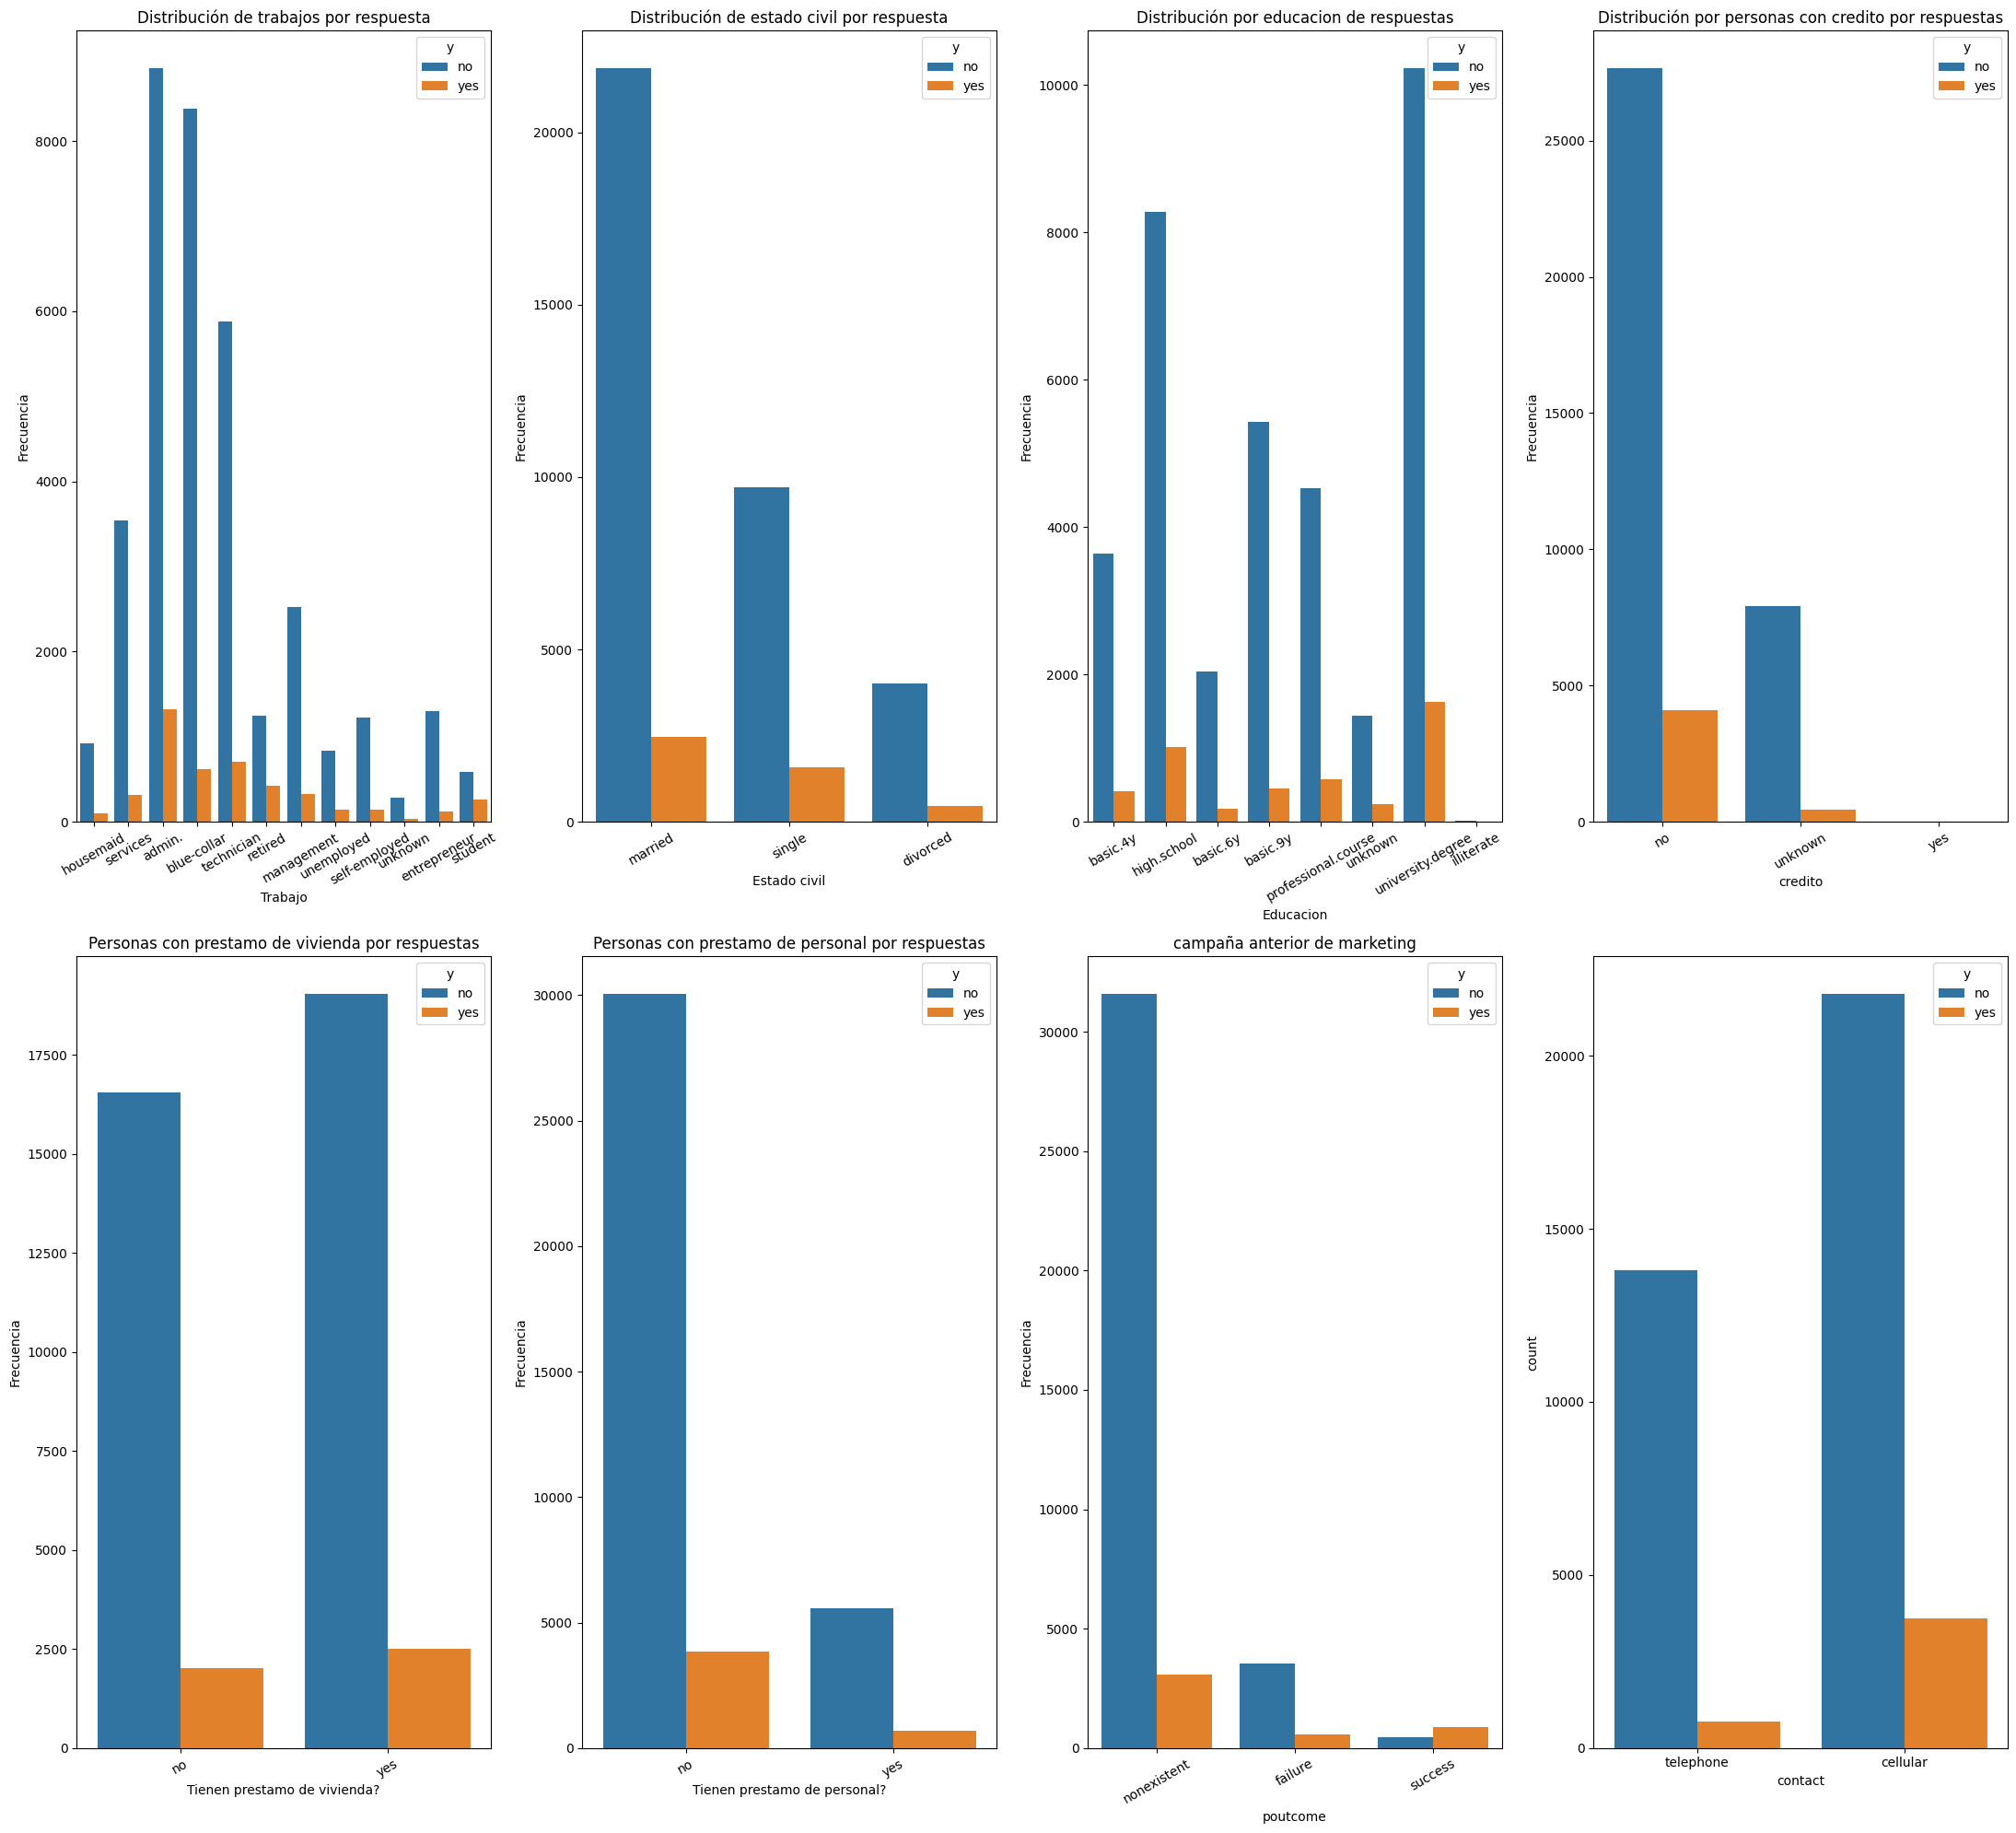

In [72]:
fig, axis = plt.subplots(2,4 , figsize=(22,20))  # Tamaño más pequeño

sns.countplot(ax=axis[0,0], data=dc, x="job", hue="y")
axis[0,0].set_title("Distribución de trabajos por respuesta")
axis[0,0].set_xlabel("Trabajo")
axis[0,0].set_ylabel("Frecuencia")
axis[0,0].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0,1], data=dc, x="marital", hue="y")
axis[0,1].set_title("Distribución de estado civil por respuesta")
axis[0,1].set_xlabel("Estado civil")
axis[0,1].set_ylabel("Frecuencia")
axis[0,1].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0,2], data=dc, x="education", hue="y")
axis[0,2].set_title("Distribución por educacion de respuestas")
axis[0,2].set_xlabel("Educacion")
axis[0,2].set_ylabel("Frecuencia")
axis[0,2].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0,3], data=dc, x="default", hue="y")
axis[0,3].set_title("Distribución por personas con credito por respuestas")
axis[0,3].set_xlabel("credito")
axis[0,3].set_ylabel("Frecuencia")
axis[0,3].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1,0], data=dc, x="housing", hue="y")
axis[1,0].set_title("Personas con prestamo de vivienda por respuestas")
axis[1,0].set_xlabel("Tienen prestamo de vivienda?")
axis[1,0].set_ylabel("Frecuencia")
axis[1,0].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1,1], data=dc, x="loan", hue="y")
axis[1,1].set_title("Personas con prestamo de personal por respuestas")
axis[1,1].set_xlabel("Tienen prestamo de personal?")
axis[1,1].set_ylabel("Frecuencia")
axis[1,1].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1,2], data=dc, x="poutcome", hue="y")
axis[1,2].set_title("campaña anterior de marketing")
axis[1,2].set_ylabel("Frecuencia")
axis[1,2].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1,3], data=dc, x="contact", hue="y")
plt.tight_layout()
plt.show()

El contacto por celular es notablemente más efectivo que el teléfono fijo o desconocido. La tasa de aceptación casi triplica la de los demás medios, lo cual sugiere que para futuras campañas sería más eficiente enfocarse en el contacto por celular

En la variable housing vemos que la tasa de aceptacion no afecta mucho. Saber si una persona esta pagando un prestamo de vivienda o no. 

La mayoria de las personas con prestamo o sin prestamos, no contrataron depositos a largo plazo, por lo tanto excluiremos esta variable de nuestro analisis. Igualmente excluiremos la variable loan.

Excluiremos la variables default de nuestro analisis, aunque es importante señalar que la mayoria de las personas que no tenian un credito fueron las que contrataron un deposito a largo plazo.

- Al visualizar la variable poutcome, podemos darnos cuenta de los resultados de la campaña previa. Como podemos ver la mayoria de las personas no se tiene informacion precisa de si fueron entrevistadas en la campaña previa. 

- En la varible educacion podemos ver que son mas personas con educacion universitaria que contrataron prestamos. En segundo lugar preparatoria.

- La variable default nos dice que la mayoría de los clientes no tienen historial de crédito incumplido, es decir, la mayoría están al corriente con sus deudas. Excluiremos la variables default de nuestro analisis. Aunque es importante señalar que la mayoria de las personas que no tenian un credito fueron las que contrataron un deposito a largo plazo,  
  la mayoria decidio no hacerlo.


Mas adelante procederemos a eliminarlas

ANALISIS ANOVA

Hipotesis, "La edad estara relacionada con con las personas que contratan depositos a largo plazo". Podira ser posible debido a que diferentes personas tienen diferentes necesidades financieras.

In [73]:
from scipy.stats import ttest_ind

yes_age = dc[dc['y'] == 'yes']['age']
no_age = dc[dc['y'] == 'no']['age']

t_stat, p_value = ttest_ind(yes_age, no_age)
print(f"T-stat: {t_stat}, P-value: {p_value}")
print("Eso significa que podemos rechazar con confianza la hipótesis nula (H₀) y aceptar la alternativa (H₁). Hay evidencia estadística fuerte de que la edad promedio difiere significativamente entre quienes aceptan y quienes no. Es decir, la edad influye de alguna manera en la decisión.")

T-stat: 6.099038240696529, P-value: 1.0768142980759426e-09
Eso significa que podemos rechazar con confianza la hipótesis nula (H₀) y aceptar la alternativa (H₁). Hay evidencia estadística fuerte de que la edad promedio difiere significativamente entre quienes aceptan y quienes no. Es decir, la edad influye de alguna manera en la decisión.


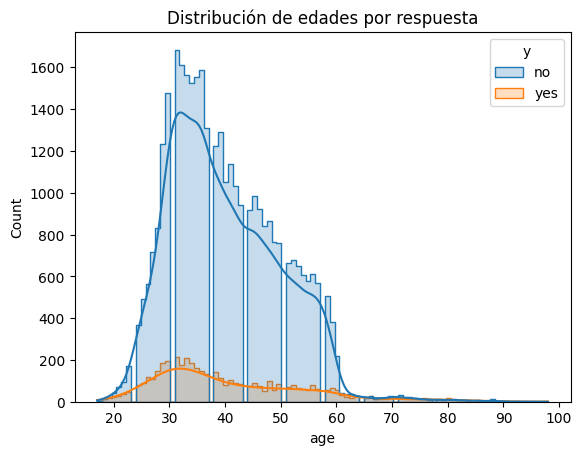

In [74]:
sns.histplot(data=dc, x='age', hue='y', kde=True, element='step')
plt.title('Distribución de edades por respuesta')
plt.show()

A partir de los 20 años las personas empiezan a solicitar prestamos, y todavia a los 60 años que bien podrian ser personas retiradas siguen solicitando depositos a largo plazo apartir de los 60 en adelante no es tan frecuente.

Como podemos ver no hay mucha relacion entre la variable target y las variables numericas

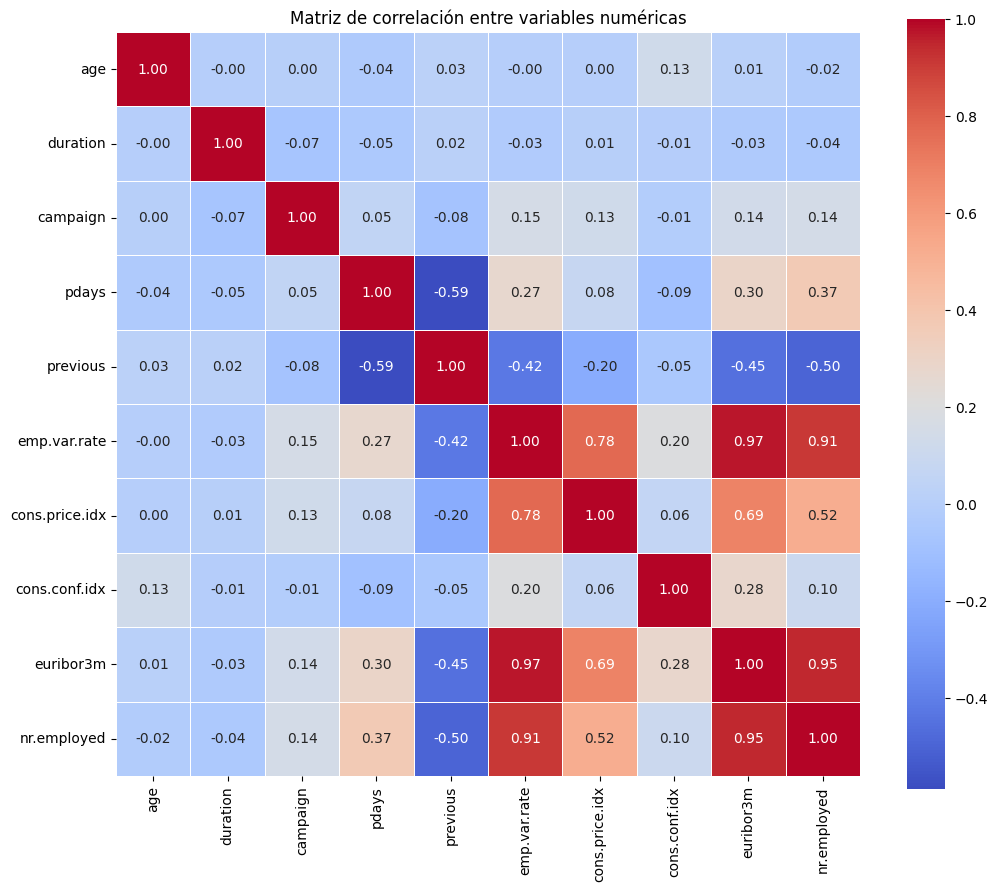

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo las columnas numéricas
num_data = datafinal.select_dtypes(include='number')

# Calculamos la matriz de correlación
corr_matrix = num_data.corr()

# Creamos el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

Vemos una alta correlacion entre las variables nr.employed, y emp.var.rate lo que seria util incluirlas en nuestro analisis.

- A mayor duración del contacto (duration), más probable que el cliente acepte (y = yes).


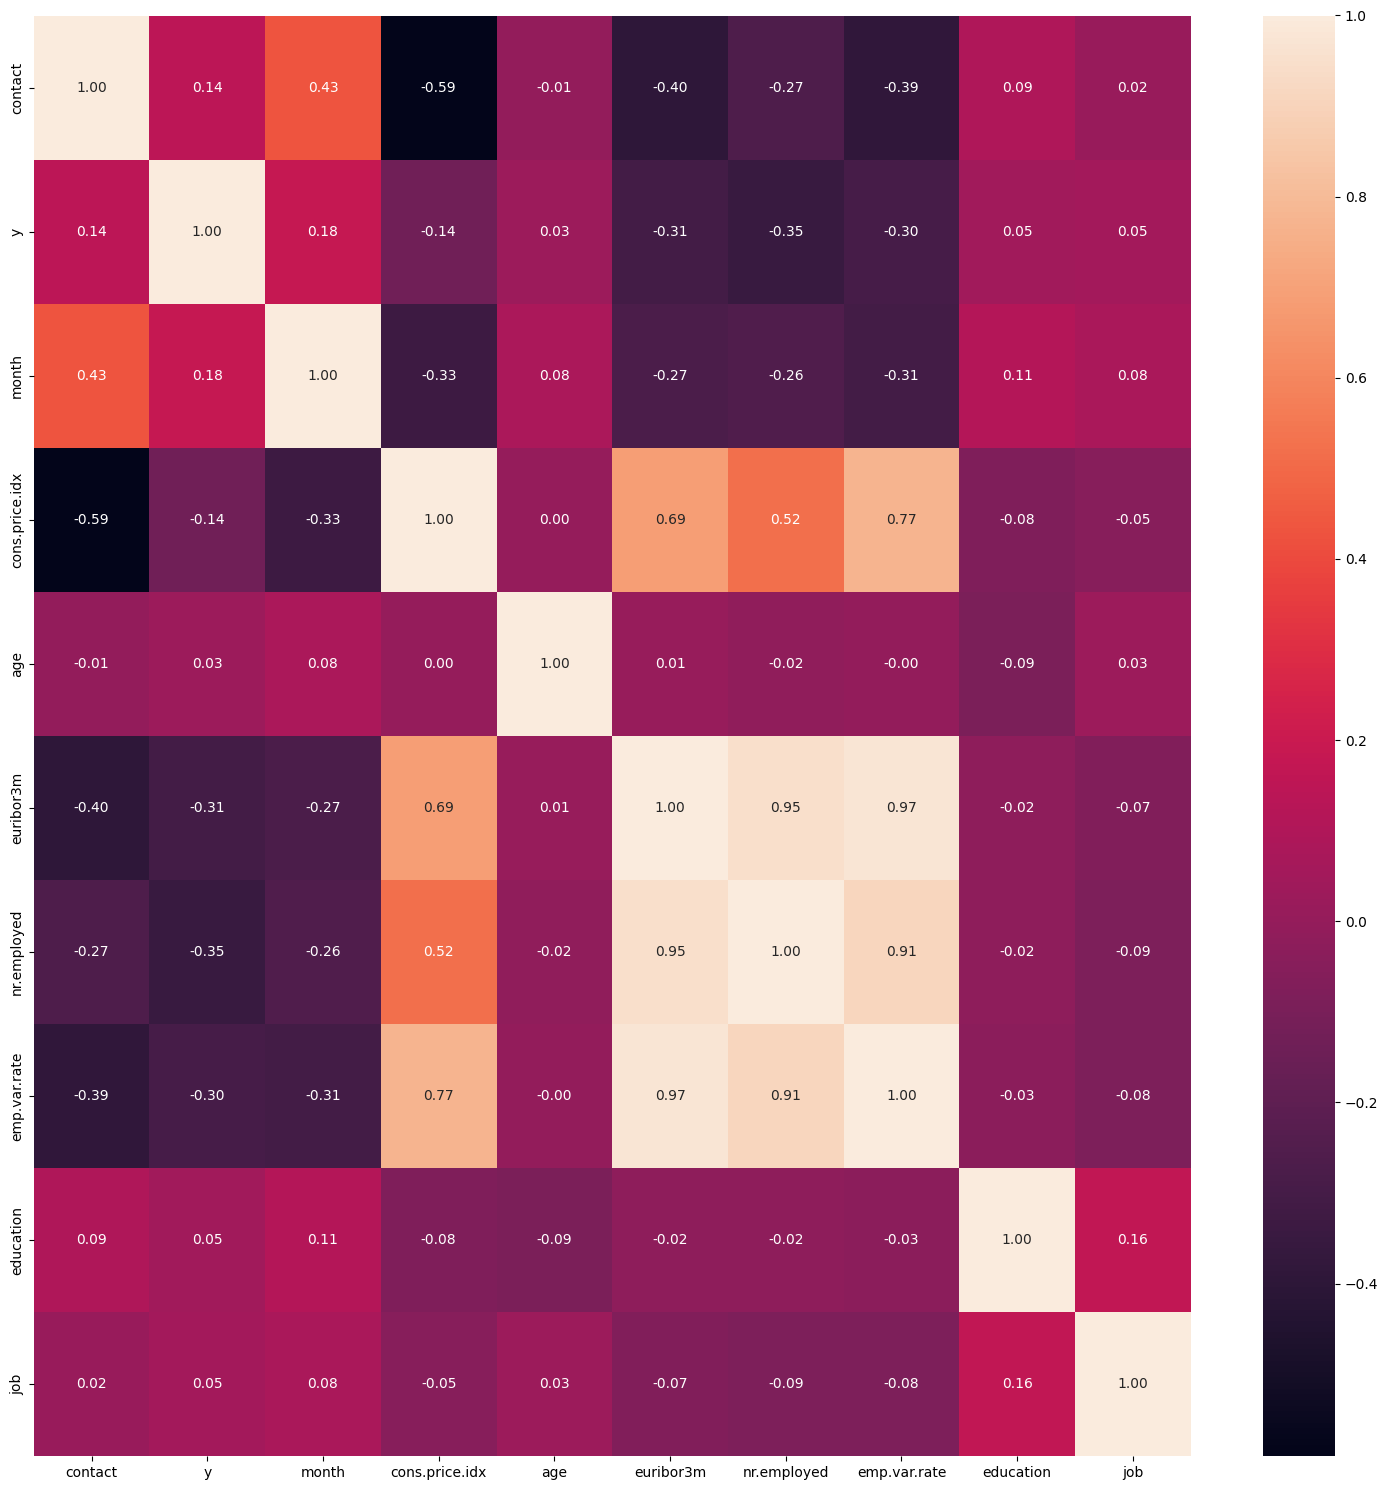

In [76]:
dc["education"]  = pd.factorize(dc["education"])[0]
dc["job"] = pd.factorize(dc["job"])[0]
dc["contact"] = pd.factorize(dc["contact"])[0]
dc["y"] = pd.factorize(dc["y"])[0]
dc["month"] = pd.factorize(dc["month"])[0]

# Ver el resultado

fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(dc[["contact", "y", "month", "cons.price.idx", "age", "euribor3m", "nr.employed", "emp.var.rate", "education","job"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

emp.var.rate (Tasa de variación del empleo):

- Si el empleo mejora (tasa positiva), las personas tienen más confianza en su situación económica y podrían estar más dispuestas a invertir en depósitos a largo plazo.

- Si el empleo cae (tasa negativa), es más difícil que alguien quiera "amarrar" su dinero en un depósito.

cons.price.idx (Índice de precios al consumidor):

- Si hay mucha inflación (índice alto), la gente prefiere tener su dinero disponible y no lo mete en depósitos (para enfrentar precios altos).

cons.conf.idx (Índice de confianza del consumidor):

- Si la confianza es alta, las personas se sienten seguras y pueden invertir en depósitos.

- Si la confianza baja, prefieren no comprometer su dinero.

euribor3m (Tasa de interés interbancario a 3 meses):

- Si el euribor está bajo, las tasas de interés que los bancos ofrecen en depósitos pueden ser más atractivas (o no, depende cómo lo ajuste el banco).

Afecta indirectamente si conviene o no abrir un depósito.



Ahora si ya que hemos visto cuales variables podrian ser importantes para entrenar nuestro modelo, procederemos a limpiarlas

In [77]:
#Eliminamos variables que carecen de inportancia en nuestro analisis

# Eliminar columnas solo si existen
columns_to_drop = ["housing", "education","day_of_week", "pdays","previous","loan","default","marital","contact" ]
columns_to_drop = [col for col in columns_to_drop if col in datafinal.columns]  # Filtrar solo las que existen
datafinal= datafinal.drop(columns=columns_to_drop)

print(datafinal.columns)
datafinal


Index(['age', 'job', 'month', 'duration', 'campaign', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')


,age,job,month,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,may,261,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,may,149,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,may,226,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,may,151,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,may,307,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,nov,334,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,nov,383,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,nov,189,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,nov,442,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


Descripcion de columnas

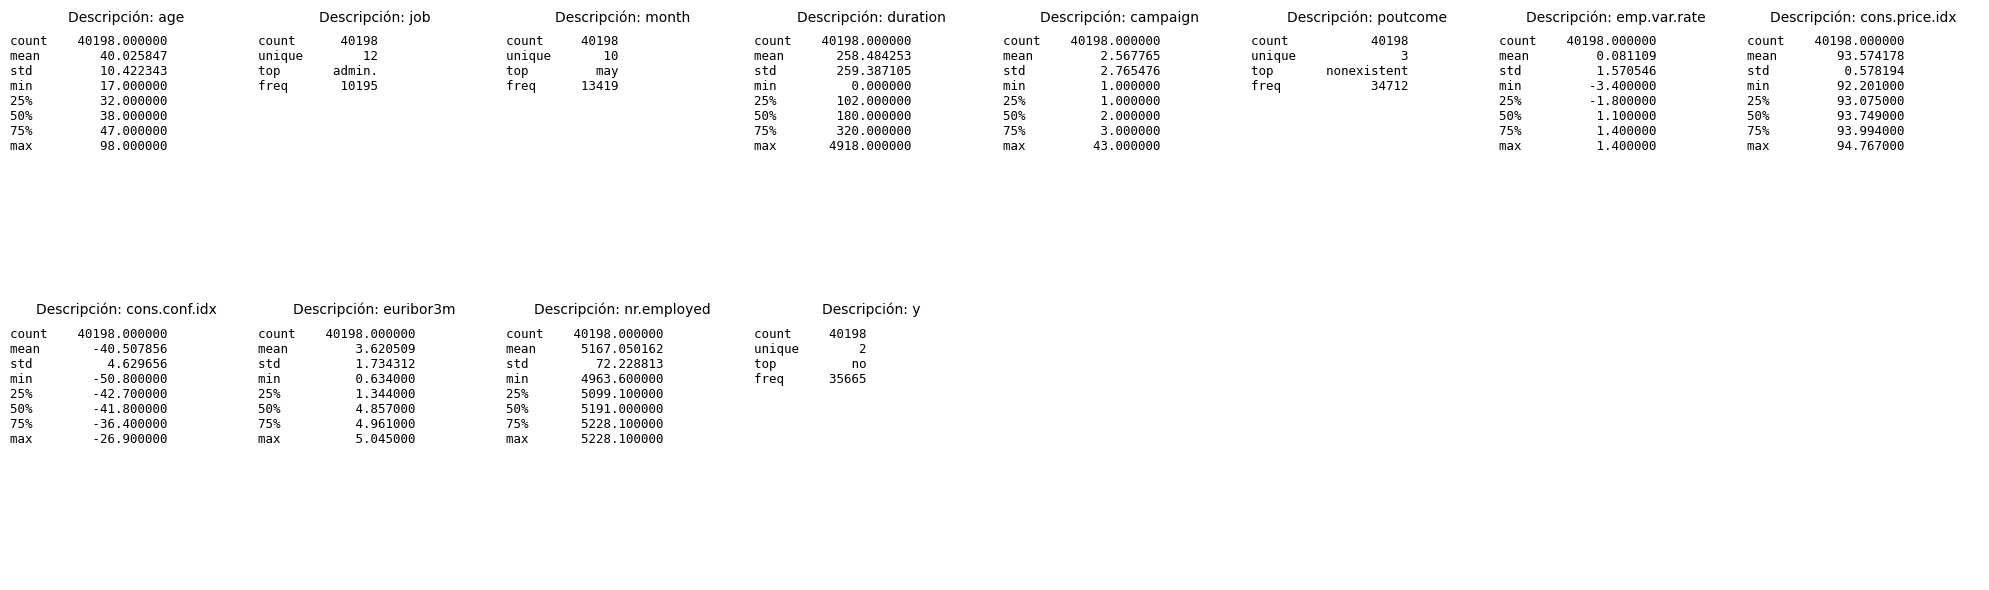

In [78]:
# Paso 1: Columnas
columnas = datafinal.columns
n = len(columnas)

# Aquí guardaremos las descripciones como diccionario
descripciones = {}

# Paso 2: Definir grid
filas = (n + 7) // 8  # 8 columnas por fila
fig, axes = plt.subplots(filas, 8, figsize=(20, 3 * filas))
axes = axes.flatten()

# Paso 3: Guardar descripciones y graficarlas
for i, col in enumerate(columnas):
    descripcion = datafinal[col].describe()
    
    # Guardamos en el diccionario
    descripciones[col] = descripcion
    
    # Convertimos a texto para graficarlo
    texto = descripcion.to_string()

    axes[i].axis('off')
    axes[i].text(0, 1, texto, fontsize=9, va='top', ha='left', family='monospace')
    axes[i].set_title(f"Descripción: {col}", fontsize=10, pad=10)

# Apagamos los subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()


Limpieza de outlers por columnas

In [79]:
# Crear una copia de `datafinal` para limpiarlo sin modificar el original
datafinal_limpio = datafinal.copy()

# Iteramos sobre las columnas en el diccionario de descripciones
for columna in descripciones:
    descripcion = descripciones[columna]

    # Revisamos que existan los cuartiles
    if "75%" in descripcion.index and "25%" in descripcion.index:
        rango_iqr = descripcion["75%"] - descripcion["25%"]
        limite_superior = descripcion["75%"] + 1.5 * rango_iqr
        limite_inferior = descripcion["25%"] - 1.5 * rango_iqr

        # Poner NaN donde haya outliers
        datafinal_limpio.loc[(datafinal_limpio[columna] < limite_inferior) | (datafinal_limpio[columna] > limite_superior), columna] = np.nan
    else:
        print(f"Saltando columna {columna}: es una variable categórica")

# Eliminar las filas con al menos un NaN (outliers)
datafinal_limpio = datafinal_limpio.dropna()
datosdemodelo= datafinal_limpio
datosdemodelo2= datafinal_limpio
# Mostrar el dataset limpio
datafinal_limpio.head()


Saltando columna job: es una variable categórica
Saltando columna month: es una variable categórica
Saltando columna poutcome: es una variable categórica
Saltando columna y: es una variable categórica


,age,job,month,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,may,261.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,may,149.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,may,226.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,may,151.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,may,307.0,1.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [80]:
print(datafinal.shape, " VS ", datafinal_limpio.shape)

(40198, 12)  VS  (34346, 12)


Paso 3: Construye un modelo de regresión logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Definir las características (X) y la variable objetivo (y)
X = datafinal_limpio.drop(columns=['y'])
y = datafinal_limpio['y']

# Si 'y' tiene valores no numéricos, convertirlos usando LabelEncoder
if y.dtypes == 'object':
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

# Crear la columna 'duration_binned' para bins de la duración
bins   = [0, 100, 200, 300, 400, 500, 600, 700]
labels = ['0-99', '100-199', '200-299', '300-399', '400-499', '500-599', '600-699']

X['duration_binned'] = pd.cut(X['duration'], bins=bins, labels=labels, right=False)

# Convertir las variables categóricas en dummies (variables binarias)
X = pd.get_dummies(X, columns=['month','duration_binned','poutcome',"job"])

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar solo las características numéricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()

# Escalar X_train y X_test solo en las columnas numéricas
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# Entrenar el modelo de regresión logística
model = LogisticRegression(C=0.001, penalty=None, solver='sag') #{'C': 0.001, 'penalty': None, 'solver': 'sag'}  C=100, penalty='l2', solver='sag', 
model.fit(X_train, y_train)

#  Aquí cambiamos: obtenemos probabilidades en lugar de predicciones directas
y_prob = model.predict_proba(X_test)[:, 1]

#  Definimos nuestro propio threshold
threshold = 0.3  # Puedes ajustar aquí el número

#  Aplicamos el threshold manualmente
y_pred = np.where(y_prob > threshold, 1, 0)
# Evaluación
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")




Accuracy: 0.9318777292576419
Confusion Matrix:
[[6078  262]
 [ 206  324]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6340
           1       0.55      0.61      0.58       530

    accuracy                           0.93      6870
   macro avg       0.76      0.78      0.77      6870
weighted avg       0.94      0.93      0.93      6870



In [82]:
# Imprimir los resultados
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9320232896652111
Confusion Matrix:
[[6078  262]
 [ 205  325]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      6340
           1       0.55      0.61      0.58       530

    accuracy                           0.93      6870
   macro avg       0.76      0.79      0.77      6870
weighted avg       0.94      0.93      0.93      6870



Paso 4: Optimiza el modelo anterior

In [89]:
from sklearn.model_selection import GridSearchCV

# Definimos los parámetros que queremos ajustar a mano
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)

In [91]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'C': 0.001, 'penalty': None, 'solver': 'sag'}


In [ ]:
model_grid = LogisticRegression(penalty = "l1", C = 10, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9372634643377001